In [1]:
# Imports
from pyspark.sql import SparkSession
import pyspark.pandas as ps

from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType, StringType, DoubleType, StructField
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

spark = SparkSession.builder.appName("AirBNB price regression").getOrCreate()

spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
# Set columns and types

22/10/07 14:06:35 WARN Utils: Your hostname, mailly-e-Lenovo-Legion-Y740-15ICHg resolves to a loopback address: 127.0.1.1; using 10.23.201.25 instead (on interface wlp0s20f3)
22/10/07 14:06:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/07 14:06:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Définition du schéma

In [2]:
cols  = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365','calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
types = [StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType(), DoubleType(), DoubleType(), StringType(), StringType(), IntegerType(), StringType(), IntegerType(), IntegerType(), IntegerType(), StringType(), StringType(), StringType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), StringType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), IntegerType(), StringType(), StringType(), StringType(), StringType(), StringType(), DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType(), StringType(), StringType(), StringType(), StringType(), StringType(), StringType()]

cols_types = list(zip(cols, types))

schema = StructType([ StructField(i[0], i[1], True) for i in cols_types])

## Import des données

In [3]:
#import csv

#pdf = ps.read_csv("./listings_2.csv", usecols=["amenities"],quoting=csv.QUOTE_ALL)\
    #.to_csv('amenities.csv')
#pdf.head()

In [4]:
#pdf.dtypes

In [5]:
df = spark.read.schema(schema).csv("./listings_2.csv", header=True).cache()

df.limit(5)

22/10/07 14:06:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
26660141,https://www.airbn...,20220606014139,2022-06-07,CHARMANT APPARTEM...,Charmant appartem...,La rue principale...,https://a0.muscac...,200407698,https://www.airbn...,Sylvie,2018-07-06,"Les Lilas, Île-de...",',within a few hours,100%,100%,f,https://a0.muscac...,https://a0.muscac...,null,1,1,['phone'],t,t,"Les Lilas, Île-de...",Buttes-Chaumont,null,48.8805,2.41413,Entire rental unit,Entire home/apt,4,null,null,1,2,"['Refrigerator', ...",$90.00,5,8,5,5,8,8,null,null,null,t,0,15,30,30,null,17,4,0,2018-10-08,2022-05-02,5.0,5.0,5.0,4.94,5.0,4.88,4.94,null,f,1,1,0,0,0.38
25177338,https://www.airbn...,20220606014139,2022-06-07,Cosy and quiet ap...,<b>The space</b><...,null,https://a0.muscac...,185793394,https://www.airbn...,Muriel,2018-04-23,"Les Lilas, Île-de...",I am a lively and...,within an hour,100%,50%,f,https://a0.muscac...,https://a0.muscac...,null,1,1,"['email', 'phone']",t,t,null,Buttes-Chaumont,null,48.88039,2.4124,Entire rental unit,Entire home/apt,2,null,null,1,1,"['Refrigerator', ...",$59.00,2,1125,2,2,1125,1125,null,null,null,t,0,0,0,1,null,17,0,0,2018-06-03,2020-03-06,4.69,4.75,4.69,4.69,4.56,4.5,4.56,null,t,1,1,0,0,0.35
25218084,https://www.airbn...,20220606014139,2022-06-07,paris avec une ma...,une maison restau...,Être dans un véri...,https://a0.muscac...,190542280,https://www.airbn...,Laure (Jade),2018-05-20,"Paris, Île-de-Fra...",Une famille avec ...,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
-que vous puissie...,within a few hours,100%,N/A,f,https://a0.muscac...,https://a0.muscac...,null,1,1,"['email', 'phone']",t,t,"Clichy, Île-de-Fr...",Batignolles-Monceau,null,48.9018,2.31366,Entire villa,Entire home/apt,10,null,2.5 baths,5,5,['Pack \u2019n pl...,$500.00,7,45,7.0,7.0,45,45,null,45.0,null,null,0,0,0,0,null,2,0,0,null,null,null,null,5.0,null,null,null,null,null,f,1,1,0,0,0.05,null,null,null,null,null,null,null,null,null,null,null,null,null
23135649,https://www.airbn...,20220606014139,2022-06-07,"Charming studio, ...",Studio apartment ...,The Saint James d...,https://a0.muscac...,171938056,https://www.airbn...,Julien,2018-02-06,FR,',within a few hours,100%,83%,f,https://a0.muscac...,https://a0.muscac...,null,1,1,['phone'],t,f,Neuilly-sur-Seine...,Passy,null,48.88173,2.25285,Private room in c...,Private room,2,null,null,null,1,"['Elevator', 'Hai...",$65.00,3,90,3,3,90,90,null,null,null,t,0,0,4,4,null,31,6,2,2018-07-13,2022-05-31,4.77,4.97,4.87,4.84,4.94,4.87,4.61,nu

In [6]:
#df.toPandas()['accommodates'].plot(kind="bar")

In [26]:
new = df.select('id', split('amenities', ',').alias('amenities'), posexplode(split('amenities', ',').alias('pos', 'val')))

#new.show()

#new.drop('val')
#new = new.select('id', 'amenities', concat(lit('amenities'), col('pos').cast('string')).alias('name'), expr('amenities[pos]').alias('val'))

#new.show()

#new.groupBy('id').pivot('name').agg(first('val')).show(1, truncate=False, vertical=False)

#new.show()
#Define useless columns and drop them

+-------+--------------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+----------+----------+
|id     |amenities0    |amenities1|amenities10|amenities11|amenities12|amenities13|amenities14|amenities15|amenities16|amenities17|a

# Nettoyage du jeu de données

In [8]:
uselessColumns = ["id", "listing_url", "scrape_id", "last_scraped", "name", "description", "neighborhood_overview", "picture_url", "host_id", "host_url", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_verifications", "host_has_profile_pic", "host_identity_verified", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms", "minimum_nights", "maximum_nights", "calendar_updated", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "license", "calendar_last_scraped", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "first_review", "last_review", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_shared_rooms", "calculated_host_listings_count_private_rooms", "reviews_per_month", "host_is_superhost", "has_availability", "instant_bookable"]

clean_df = df.drop(*uselessColumns)

print(f"DataFrame Columns count : {len(clean_df.columns)}")
# clear text in double columns
clean_df = clean_df.withColumn('price', regexp_replace('price', '$', ''))
clean_df = clean_df.withColumn('price', col("price").cast('double').alias("price"))
clean_df = clean_df.withColumn('bathrooms_text', regexp_replace('bathrooms_text', r' \s(.*)', ''))
clean_df = clean_df.withColumn('bathrooms_text', col("bathrooms_text").cast('double').alias("bathrooms_text"))

clean_df.limit(2)

DataFrame Columns count : 25


neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_minimum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
Buttes-Chaumont,48.8805,2.41413,Entire rental unit,Entire home/apt,4,null,1,2,"['Refrigerator', ...",null,5,null,null,0,15,30,30,5.0,5.0,5.0,4.94,5.0,4.88,4.94
Buttes-Chaumont,48.88039,2.4124,Entire rental unit,Entire home/apt,2,null,1,1,"['Refrigerator', ...",null,2,null,null,0,0,0,1,4.69,4.75,4.69,4.69,4.56,4.5,4.56


In [9]:
clean_df.columns

['neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [10]:
clean_df.describe()

summary,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_minimum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56393,38874,39350,56302,56327,38968,2570,33309,40043,56032,5249,5596,8978,10539,16042,17227,17849,18248,28235,29114,29813,30231,30672,30797,30898
mean,764157.469312072,16332.979223226963,13993.537890396949,333176.04216478823,207144.60053273328,4296.044113118456,154488.68054474707,1836.1917499774836,1366.7196513747722,243.8367478379869,46238.75565563081,75652.61829878484,265.1897972822455,299.2696650536104,356.4001371400075,369.6523480582806,935.1714381758081,925.465201665936,3.371783871626679...,3.544507568507178...,3.689770811758912E10,3.658270728846818E10,3.673421719754317...,4.976229060325401E10,6.661118611566022E10
stddev,1.3364523346546555E7,1607760.1682508031,2163991.7479713354,7967376.484864741,9095655.12386041,678686.6179715928,3483569.379462076,313377.577643728,175728.77740294367,412.0580795762964,2195775.4063358596,5556258.619364752,424.7060215010842,1059.141130848586,903.8859655375907,885.350896913105,74848.85589665984,74026.08014067251,5.036635632251697...,5.150271018409410...,5.261574126046806E11,5.234377152577349E11,5.24004970734087E11,6.093670223061415E11,7.041896058807549E11
min,Singapore (mayb...,0.0,0.0,"""""120\"""" HDTV wi...","""""120\"""" TV""""",0,0.0,0,0,"""""135\"""" HDTV""""",0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,Élysée,2.84965559E8,4.24567115E8,Élysée,가정주부입니다.,131518585,1.25797498E8,57106251,33058287,Élysée,1.14130941E8,415596168,9999,99999,99999,99999,10000000,10000000,9.204400027815E12,9.201200062515E12,9.205100008015E12,9.202600014915E12,7.515128954863E12,7.589637410352E12,7.512345678987E12


In [11]:
#Starting String Indexer
indexer = StringIndexer().setHandleInvalid("keep")

indexer.setInputCols(["neighbourhood_cleansed", "property_type", "room_type"])
indexer.setOutputCols(["neighbourhood_cleansed_numeric", "property_type_numeric", "room_type_numeric"])

indexer_fitted = indexer.fit(clean_df)

df_indexed = indexer_fitted.transform(clean_df)

df_indexed.limit(5)
# Init oneHotEncoder
oneHotEncoder = OneHotEncoder()
oneHotEncoder.setInputCols(["neighbourhood_cleansed_numeric", "property_type_numeric", "room_type_numeric"])
oneHotEncoder.setOutputCols(["neighbourhood_cleansed_explode", "property_type_explode", "room_type_explode"])
model = oneHotEncoder.fit(df_indexed)
model.setOutputCols(["neighbourhood_cleansed_explode", "property_type_explode", "room_type_explode"])
model.getHandleInvalid()
model.transform(df_indexed).limit(1)

neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_minimum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_cleansed_numeric,property_type_numeric,room_type_numeric,neighbourhood_cleansed_explode,property_type_explode,room_type_explode
Buttes-Chaumont,48.8805,2.41413,Entire rental unit,Entire home/apt,4,null,1,2,"['Refrigerator', ...",null,5,null,null,0,15,30,30,5.0,5.0,5.0,4.94,5.0,4.88,4.94,6.0,0.0,0.0,"(1172,[6],[1.0])","(1844,[0],[1.0])","(1541,[0],[1.0])"


In [12]:
feature_cat=["neighbourhood_cleansed", "property_type", "room_type"]
feature_cat_indexed = [col+'_indexed' for col in feature_cat]
feature_cat_encoded = [col +'_encoded' for col in feature_cat_indexed]
feature_numeric = [
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_minimum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

indexerFeature = StringIndexer(inputCols=feature_cat, outputCols=feature_cat_indexed, handleInvalid="skip")

result_df = indexerFeature.fit(clean_df).transform(clean_df)
#result_df.show(n=1, truncate=False, vertical=True)

## OneHotEncoder

In [13]:
encoderFeature = OneHotEncoder(dropLast=False, inputCols=feature_cat_indexed, outputCols=feature_cat_encoded)

result_df = encoderFeature.fit(result_df).transform(result_df)

#result_df.select(feature_cat_indexed+feature_cat_encoded+feature_numeric).show(n=2, truncate=False, vertical=True)

## Vector Assembler

In [14]:
assembler = VectorAssembler(inputCols=feature_cat_encoded+feature_numeric, outputCol="features", handleInvalid="keep")

#result_df = assembler.transform(result_df).select(feature_cat+feature_numeric+feature_cat_encoded+['features'])

result_df.show(n=2, truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 neighbourhood_cleansed                 | Buttes-Chaumont                                                                                                                                                                                                                                                                                                                         
 latitude                               | 48.8805                                                                                                                                                                                                                 

# Correlation des données
## Scatter matrix

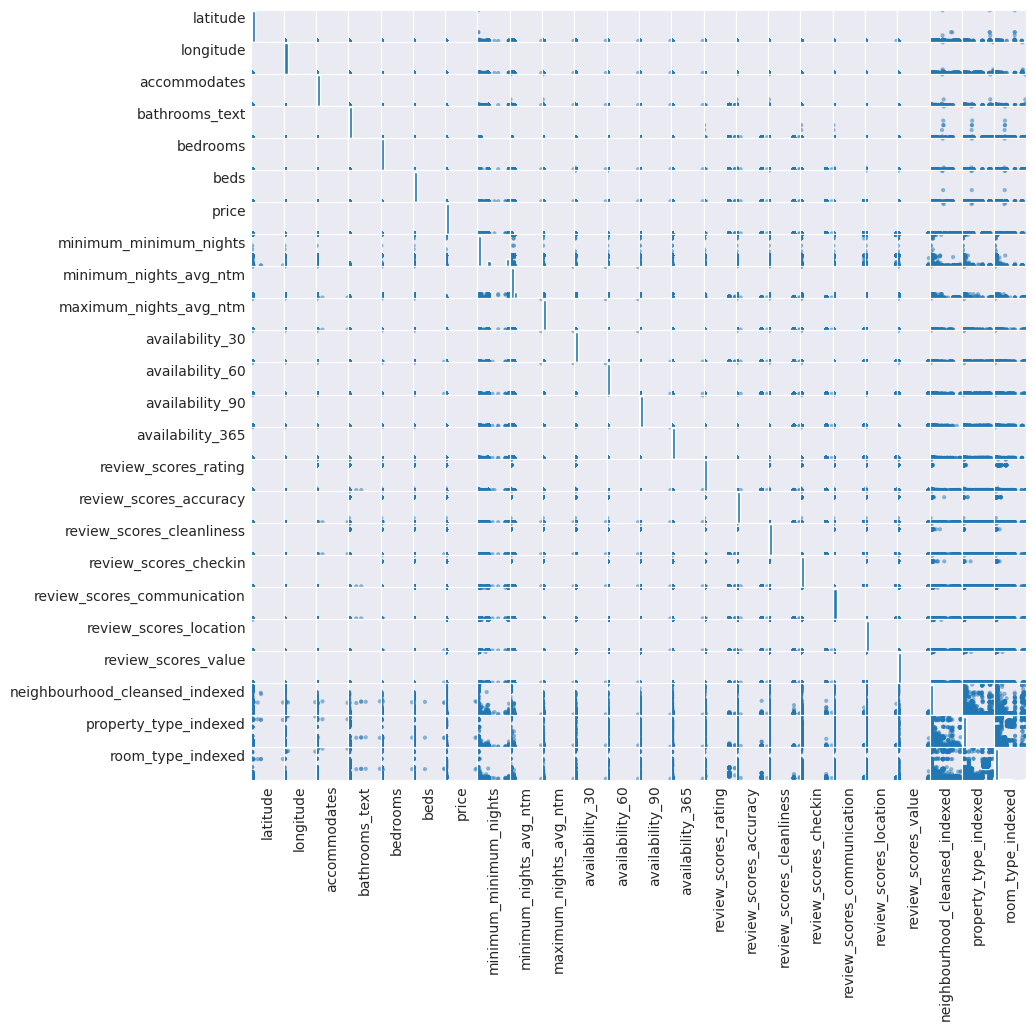

In [15]:
import pandas as pd
numeric_features = [t[0] for t in result_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = result_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

## Heatmap

/tmp/ipykernel_3632/2846759024.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result_df.toPandas().corr(),annot = True)


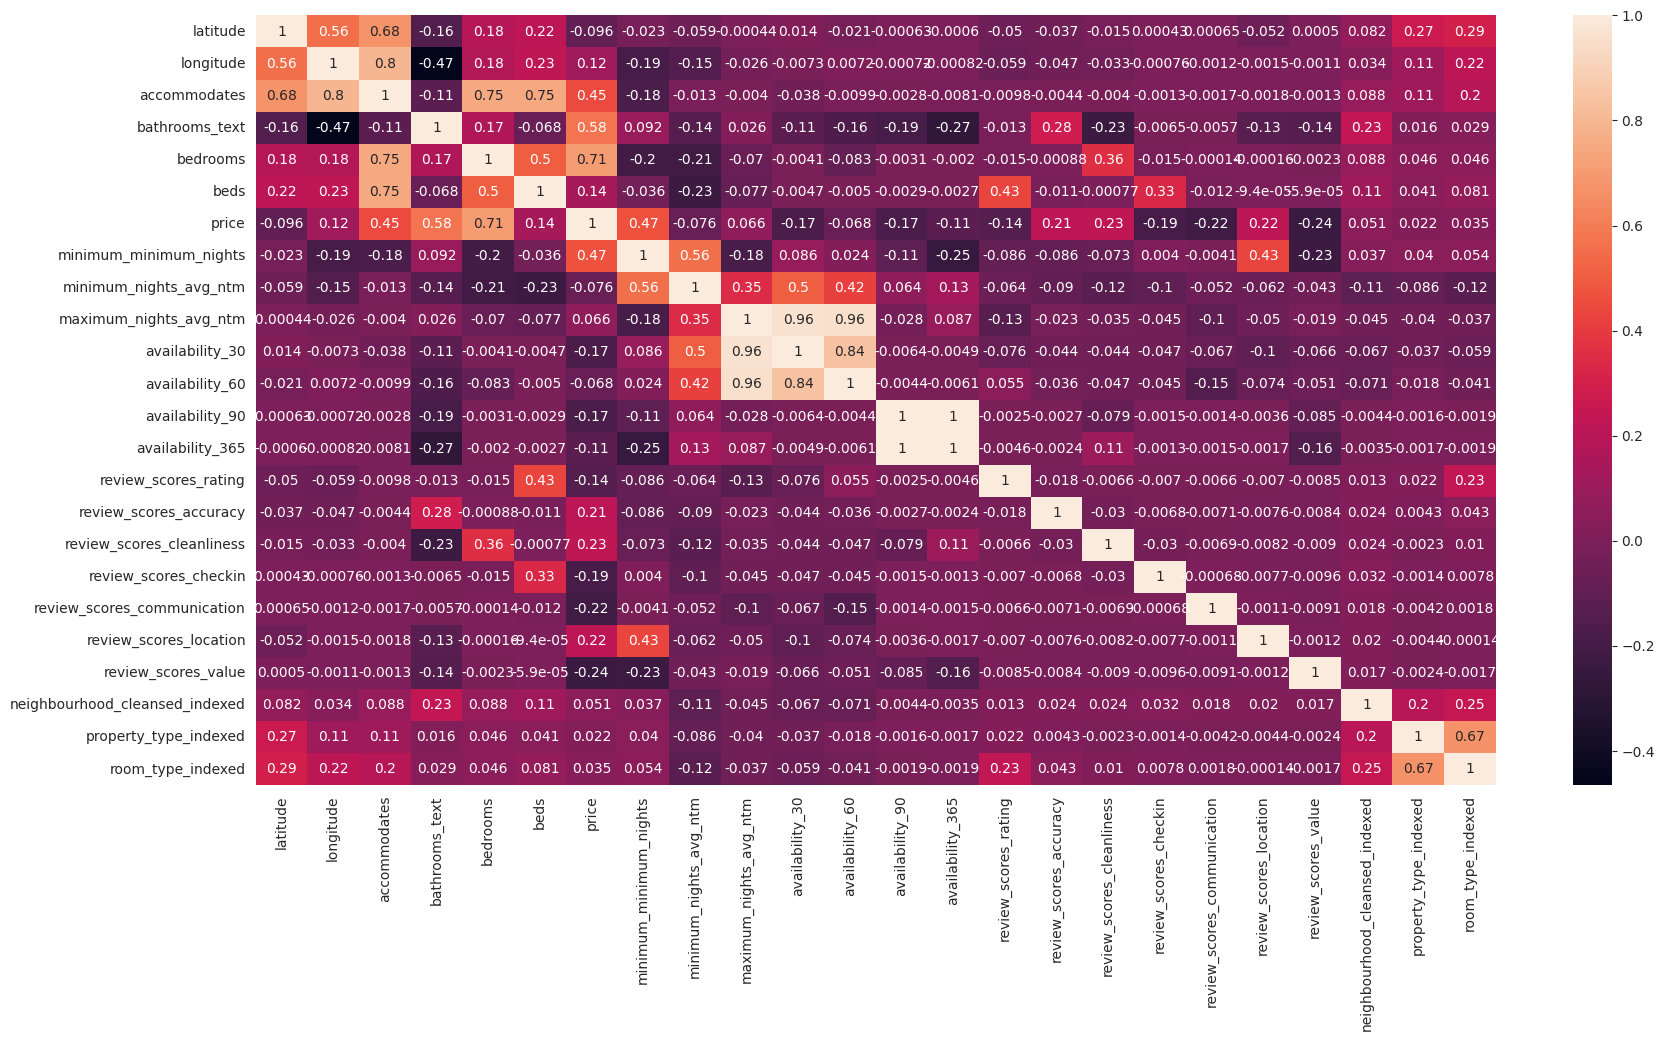

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(result_df.toPandas().corr(),annot = True)
plt.show()

# Division du jeu de données

In [ ]:
train, test = clean_df.randomSplit([0.7, 0.3],seed = 11)
train.show(n=1, truncate=False, vertical=True)
test.show(n=1, truncate=False, vertical=True)

# LinearRegression

In [18]:
lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(result_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

IllegalArgumentException: features does not exist. Available: neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, minimum_minimum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, availability_30, availability_60, availability_90, availability_365, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, neighbourhood_cleansed_indexed, property_type_indexed, room_type_indexed, neighbourhood_cleansed_indexed_encoded, property_type_indexed_encoded, room_type_indexed_encoded

In [19]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

NameError: name 'lr_model' is not defined

# Vérification de la corruption des données

In [23]:
print(df.count())
clean_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in clean_df.columns]).show(truncate=False, vertical=False)

125487
+----------------------+--------+---------+-------------+---------+------------+--------------+--------+-----+---------+------+----------------------+----------------------+----------------------+---------------+---------------+---------------+----------------+--------------------+----------------------+-------------------------+---------------------+---------------------------+----------------------+-------------------+
|neighbourhood_cleansed|latitude|longitude|property_type|room_type|accommodates|bathrooms_text|bedrooms|beds |amenities|price |minimum_minimum_nights|minimum_nights_avg_ntm|maximum_nights_avg_ntm|availability_30|availability_60|availability_90|availability_365|review_scores_rating|review_scores_accuracy|review_scores_cleanliness|review_scores_checkin|review_scores_communication|review_scores_location|review_scores_value|
+----------------------+--------+---------+-------------+---------+------------+--------------+--------+-----+---------+------+----------------

# Pipeline

In [ ]:
Pipeline(stages=[indexerFeature]+[encoderFeature]+[assembler]+[lr]).fit(train).transform(test).show(n=1, truncate=False, vertical=True)